In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('data/customer_dataset_cleaned.csv')

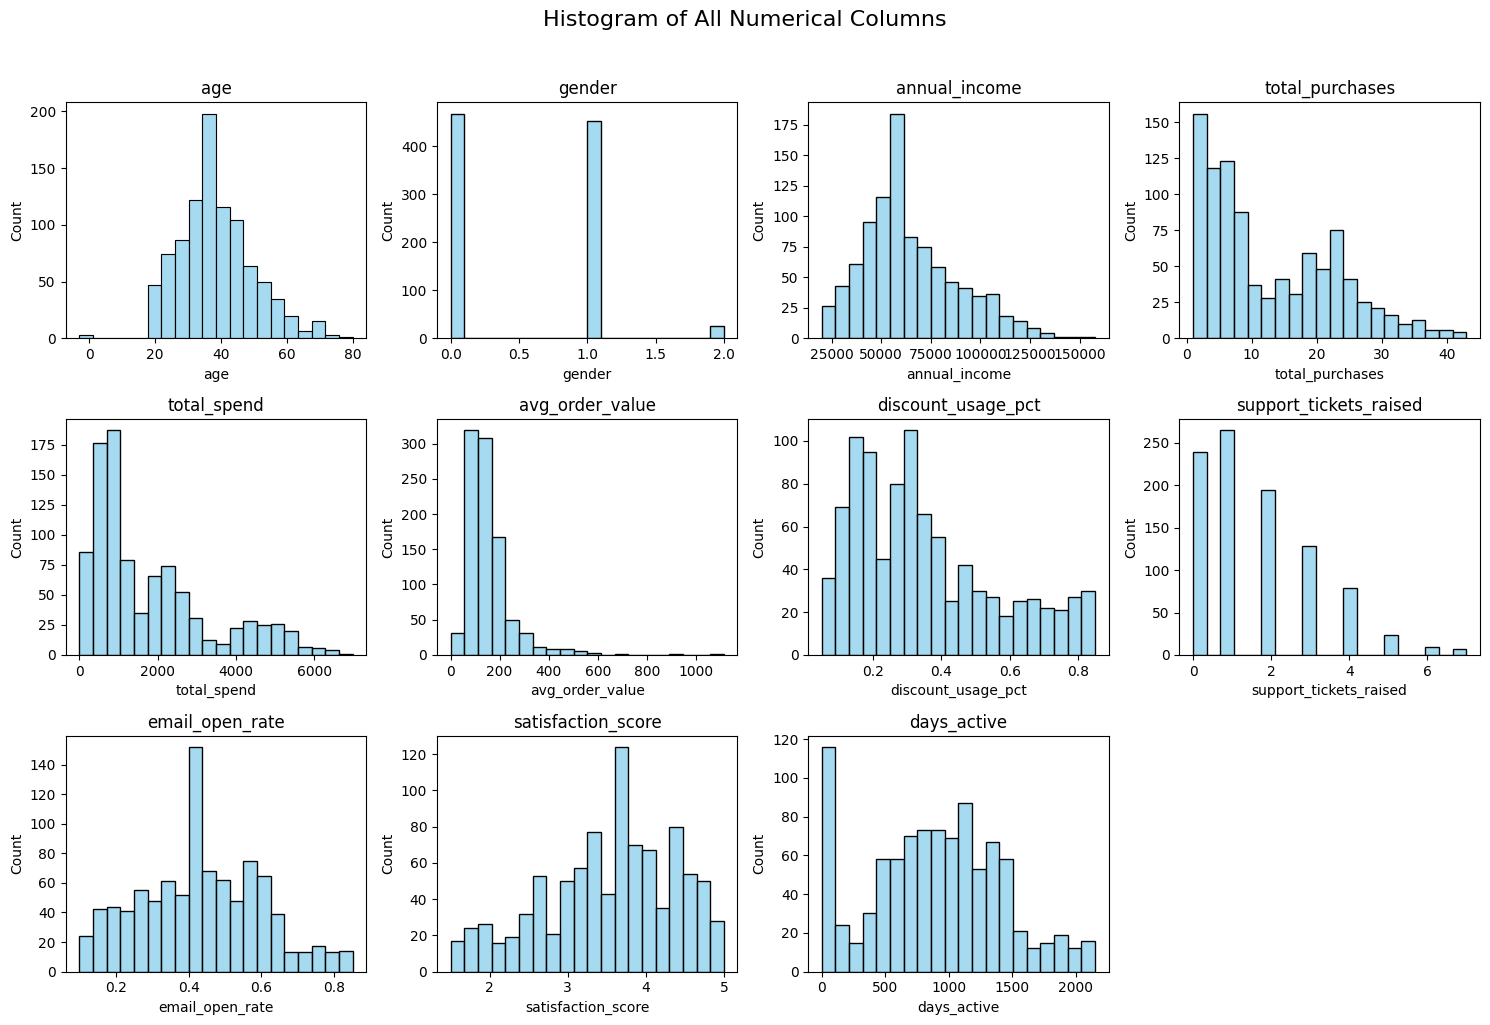

In [5]:
numerical_cols = df.select_dtypes(include=[np.number]).columns
n_cols = 4  
n_rows = int(np.ceil(len(numerical_cols) / n_cols))

plt.figure(figsize=(15, 10))
plt.suptitle('Histogram of All Numerical Columns', fontsize=16, y=1.02)

for i, col in enumerate(numerical_cols):
    plt.subplot(n_rows, n_cols, i+1)
    sns.histplot(df[col], kde=False, bins=20, color='skyblue')
    plt.title(col)
    plt.tight_layout()

plt.show()

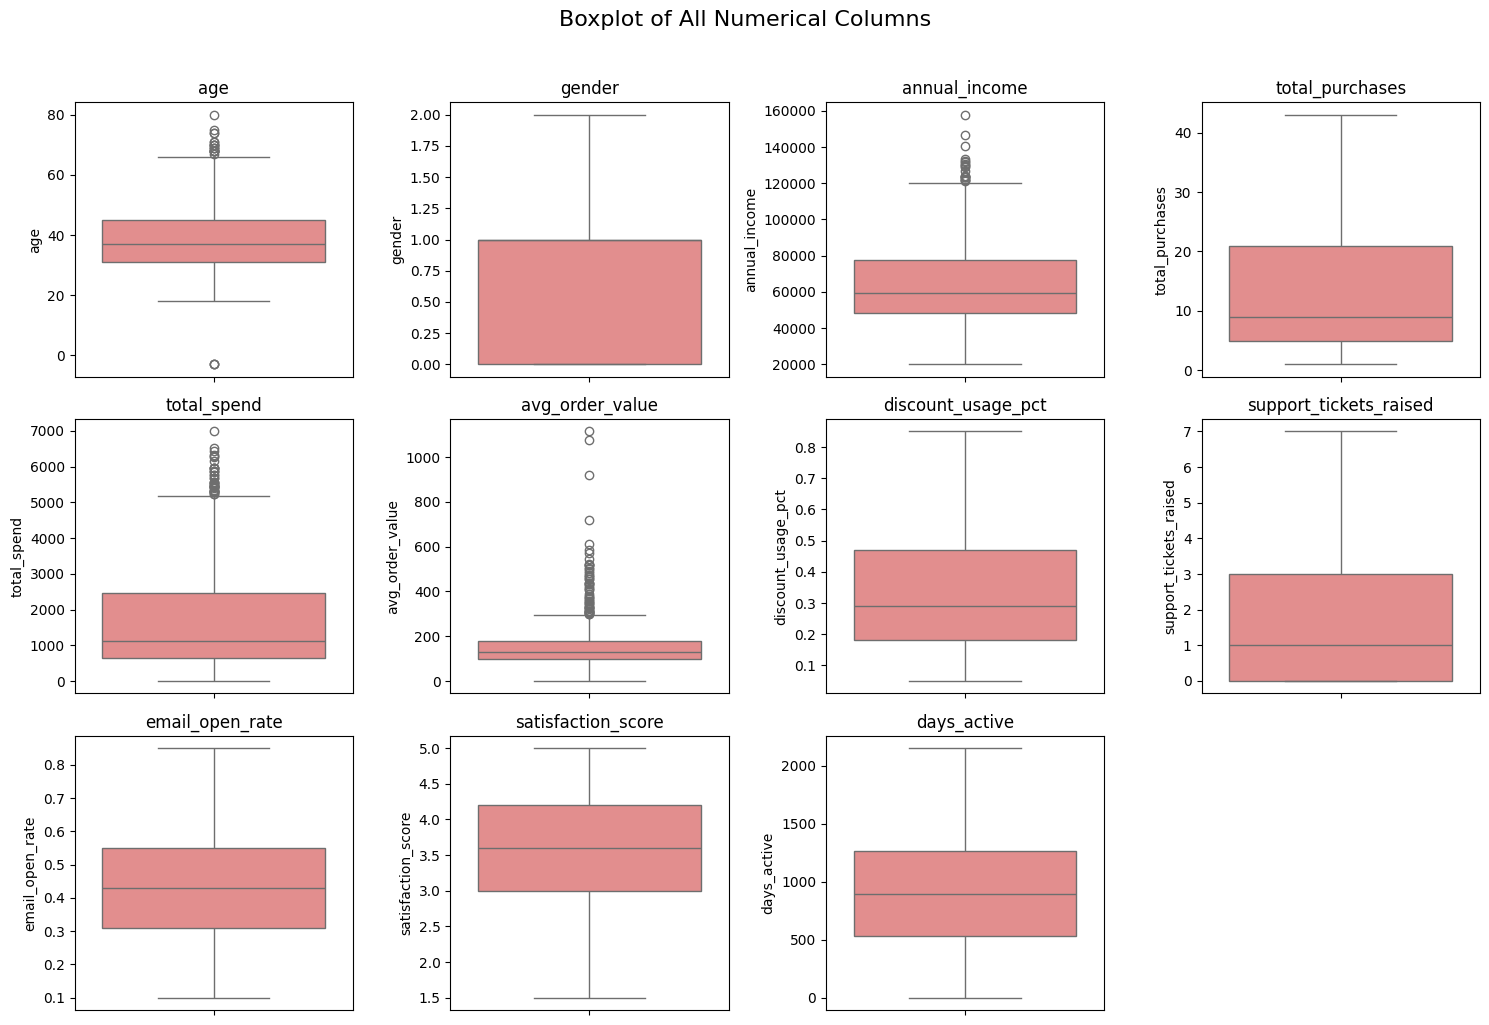

In [6]:
numerical_cols = df.select_dtypes(include=[np.number]).columns
n_cols = 4  
n_rows = int(np.ceil(len(numerical_cols) / n_cols))

plt.figure(figsize=(15, 10))
plt.suptitle('Boxplot of All Numerical Columns', fontsize=16, y=1.02)

for i, col in enumerate(numerical_cols):
    plt.subplot(n_rows, n_cols, i+1)
    sns.boxplot(y=df[col], color='lightcoral')
    plt.title(col)
    plt.tight_layout()

plt.show()

In [7]:
df.columns

Index(['customer_id', 'full_name', 'email', 'phone', 'age', 'gender', 'city',
       'region', 'annual_income', 'join_date', 'last_purchase_date',
       'total_purchases', 'total_spend', 'avg_order_value',
       'discount_usage_pct', 'support_tickets_raised', 'email_open_rate',
       'preferred_category', 'satisfaction_score', 'loyalty_tier',
       'days_active'],
      dtype='object')

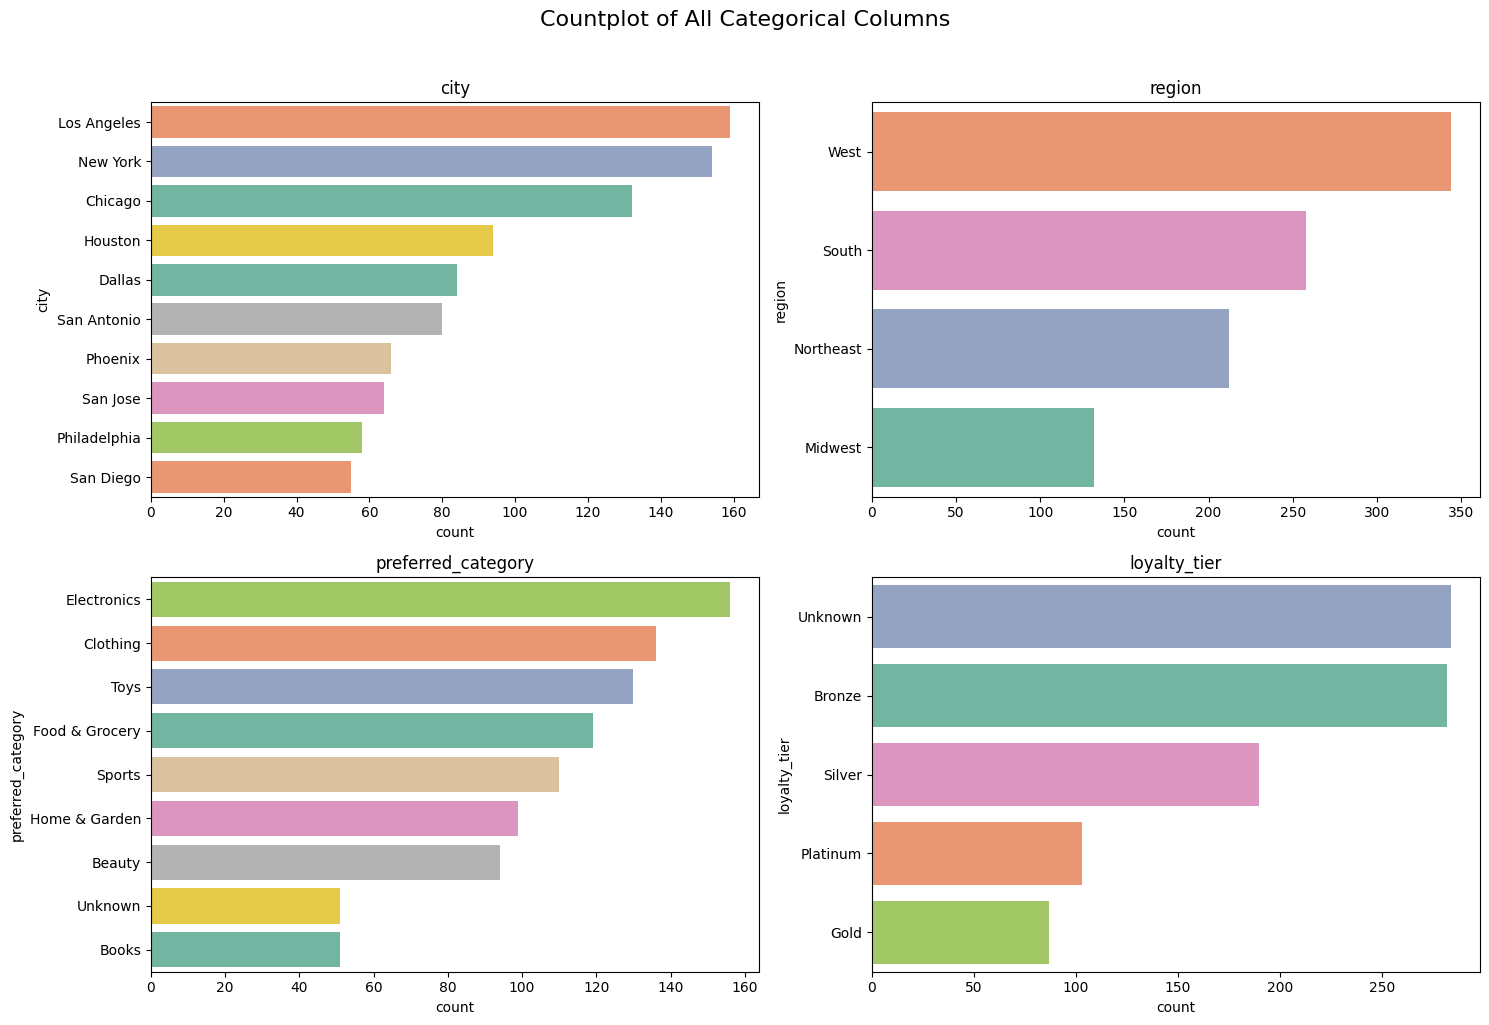

In [8]:
categorical_cols = ['city', 'region', 'preferred_category', 'loyalty_tier']
n_cols = 2  # Adjust columns per row for better readability
n_rows = int(np.ceil(len(categorical_cols) / n_cols))

plt.figure(figsize=(15, 10))
plt.suptitle('Countplot of All Categorical Columns', fontsize=16, y=1.02)

for i, col in enumerate(categorical_cols):
    plt.subplot(n_rows, n_cols, i+1)
    sns.countplot(
        y=df[col], 
        order=df[col].value_counts().index,  # ensures bars are sorted
        palette='Set2',
        hue=df[col],
        legend=False
    )
    plt.title(col)

plt.tight_layout()
plt.show()

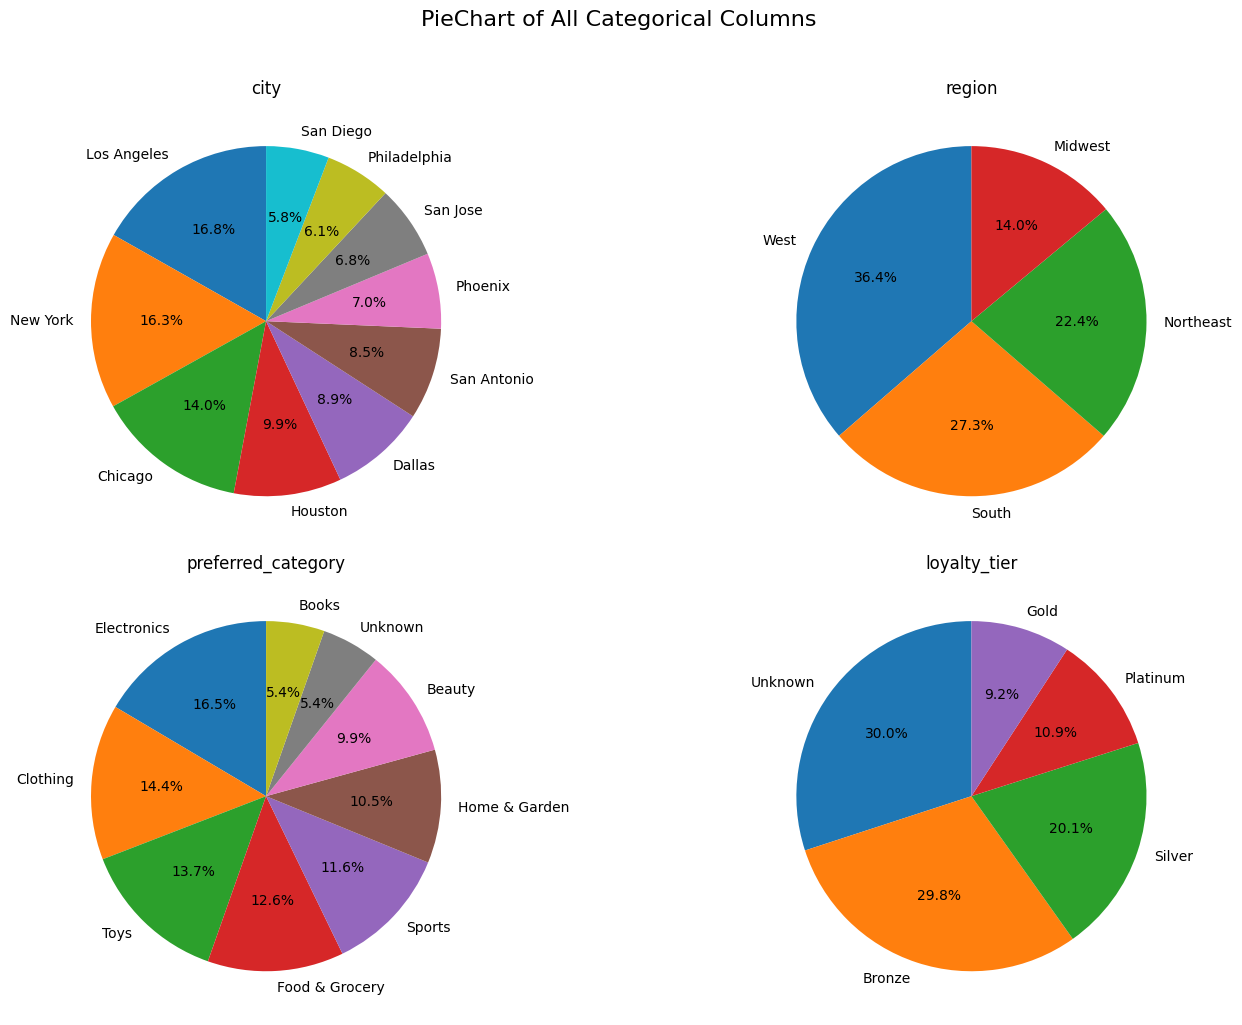

In [9]:
categorical_cols = ['city', 'region', 'preferred_category', 'loyalty_tier']
n_cols = 2  # Adjust columns per row for better readability
n_rows = int(np.ceil(len(categorical_cols) / n_cols))

plt.figure(figsize=(15, 10))
plt.suptitle('PieChart of All Categorical Columns', fontsize=16, y=1.02)

for i, col in enumerate(categorical_cols):
    plt.subplot(n_rows, n_cols, i+1)
    plt.pie(
        df[col].value_counts().values,
        labels=df[col].value_counts().index,
        autopct='%1.1f%%',
        startangle=90
    )
    plt.title(col)

plt.tight_layout()
plt.show()

In [10]:
df.columns

Index(['customer_id', 'full_name', 'email', 'phone', 'age', 'gender', 'city',
       'region', 'annual_income', 'join_date', 'last_purchase_date',
       'total_purchases', 'total_spend', 'avg_order_value',
       'discount_usage_pct', 'support_tickets_raised', 'email_open_rate',
       'preferred_category', 'satisfaction_score', 'loyalty_tier',
       'days_active'],
      dtype='object')

/tmp/ipykernel_10148/3955405739.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


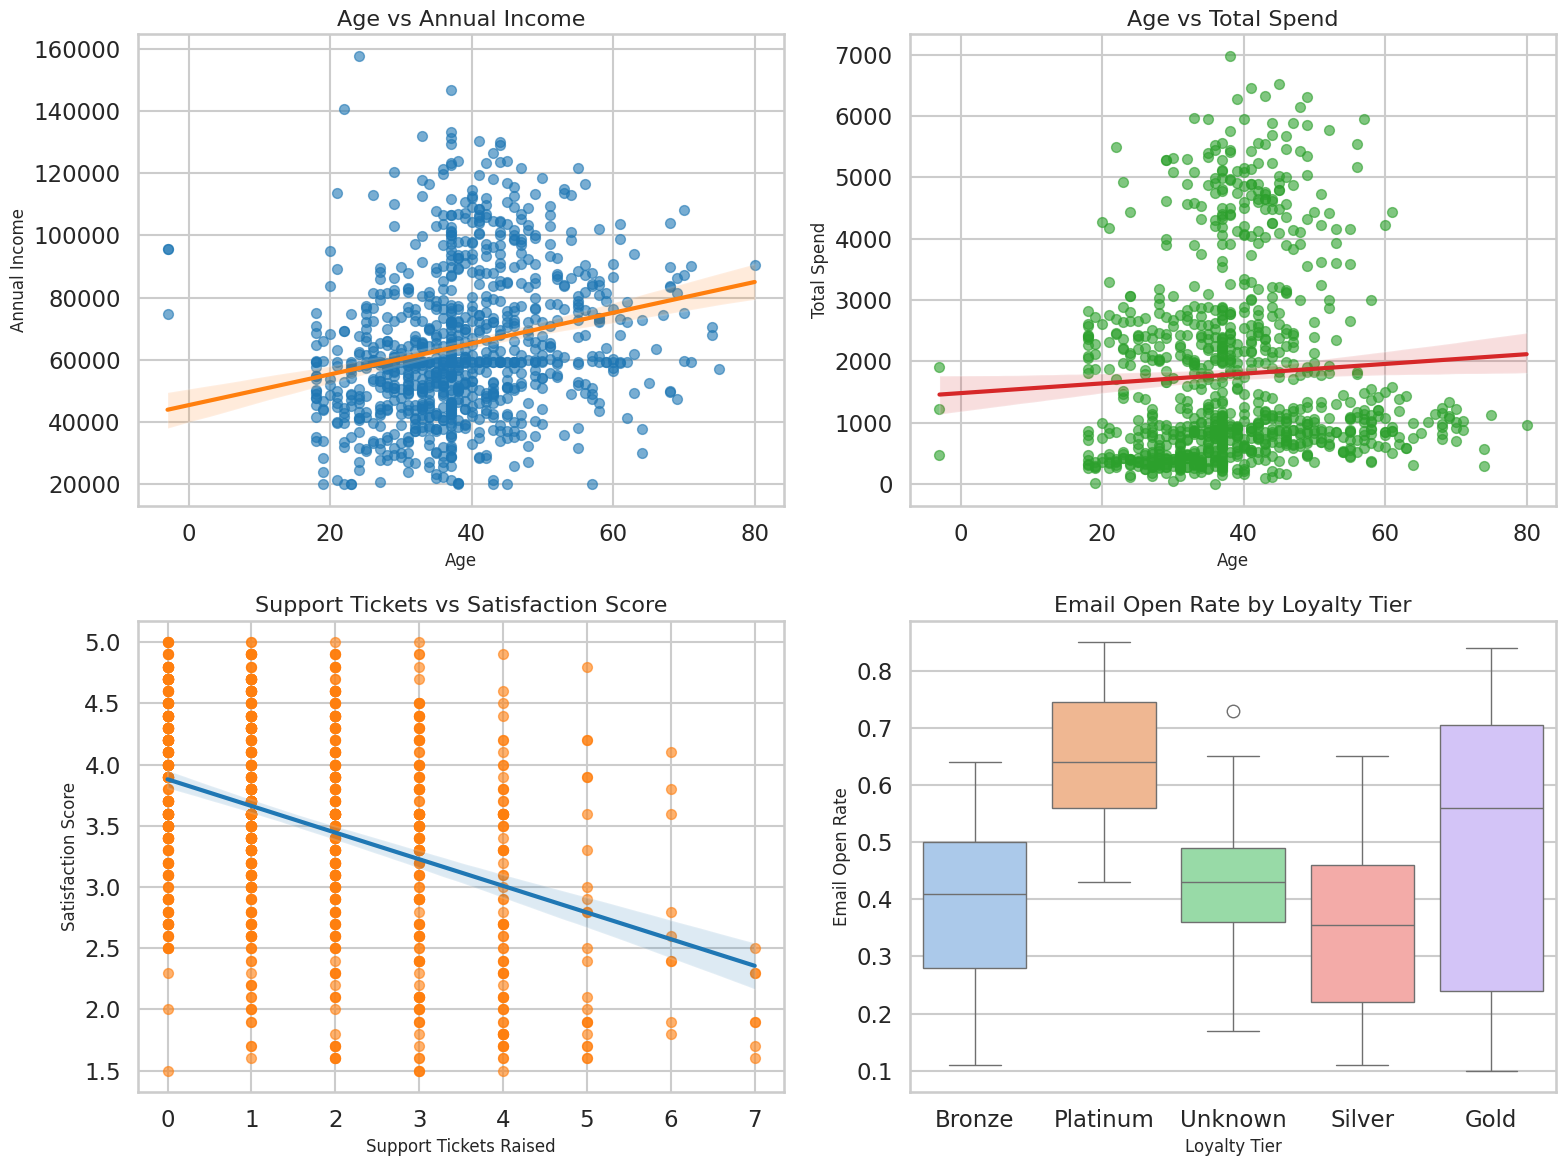

In [17]:
totalSpend_vs_income = df[['age', 'annual_income']].dropna()
totalSpend_vs_Age = df[['age', 'total_spend']].dropna()
satisfaction_score_vs_support_tickets = df[['satisfaction_score', 'support_tickets_raised']].dropna()
email_open_rate_vs_loyalty_tier = df[['email_open_rate', 'loyalty_tier']].dropna()

sns.set_style("whitegrid")
sns.set_context("talk")

plt.figure(figsize=(16, 12))

# 1. Age vs Annual Income
plt.subplot(2, 2, 1)
sns.regplot(
    x='age', y='annual_income', data=totalSpend_vs_income,
    scatter_kws={'s': 50, 'alpha': 0.6, 'color': '#1f77b4'},
    line_kws={'color': '#ff7f0e', 'linewidth': 3}
)
plt.title('Age vs Annual Income', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Annual Income', fontsize=12)

# 2. Age vs Total Spend
plt.subplot(2, 2, 2)
sns.regplot(
    x='age', y='total_spend', data=totalSpend_vs_Age,
    scatter_kws={'s': 50, 'alpha': 0.6, 'color': '#2ca02c'},
    line_kws={'color': '#d62728', 'linewidth': 3}
)
plt.title('Age vs Total Spend', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Total Spend', fontsize=12)

# 3. Satisfaction Score vs Support Tickets
plt.subplot(2, 2, 3)
sns.regplot(
    x='support_tickets_raised', y='satisfaction_score', data=satisfaction_score_vs_support_tickets,
    scatter_kws={'s': 50, 'alpha': 0.6, 'color': '#ff7f0e'},
    line_kws={'color': '#1f77b4', 'linewidth': 3}
)
plt.title('Support Tickets vs Satisfaction Score', fontsize=16)
plt.xlabel('Support Tickets Raised', fontsize=12)
plt.ylabel('Satisfaction Score', fontsize=12)

# 4. Email Open Rate by Loyalty Tier (boxplot since loyalty_tier is categorical)
plt.subplot(2, 2, 4)
sns.boxplot(
    x='loyalty_tier', y='email_open_rate', data=email_open_rate_vs_loyalty_tier,
    palette='pastel'
)
plt.title('Email Open Rate by Loyalty Tier', fontsize=16)
plt.xlabel('Loyalty Tier', fontsize=12)
plt.ylabel('Email Open Rate', fontsize=12)

plt.tight_layout()
plt.show()

In [21]:
df.columns  

Index(['customer_id', 'full_name', 'email', 'phone', 'age', 'gender', 'city',
       'region', 'annual_income', 'join_date', 'last_purchase_date',
       'total_purchases', 'total_spend', 'avg_order_value',
       'discount_usage_pct', 'support_tickets_raised', 'email_open_rate',
       'preferred_category', 'satisfaction_score', 'loyalty_tier',
       'days_active'],
      dtype='object')

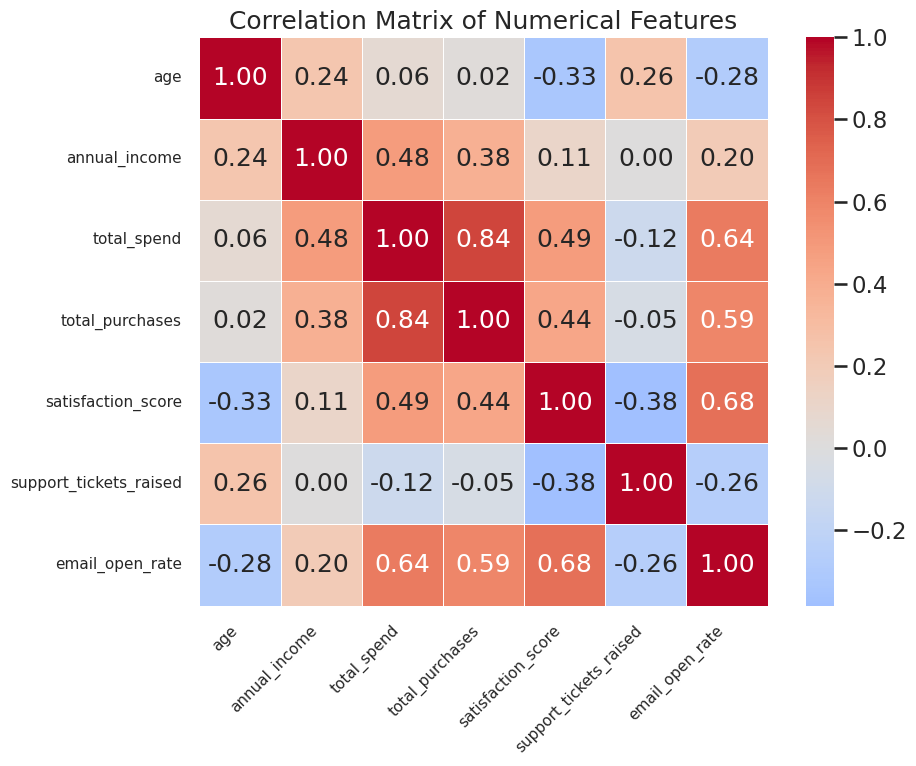

In [22]:
corr_col = [
    'age', 
    'annual_income', 
    'total_spend', 
    'total_purchases', 
    'satisfaction_score', 
    'support_tickets_raised', 
    'email_open_rate'
]

corr_matrix = df[corr_col].corr()

plt.figure(figsize=(10, 8))

sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    center=0,
    linewidths=0.5,
    linecolor='white',
    square=True
)

plt.title('Correlation Matrix of Numerical Features', fontsize=18)
plt.xticks(rotation=45, ha='right', fontsize=11)
plt.yticks(rotation=0, fontsize=11)
plt.tight_layout()
plt.show()

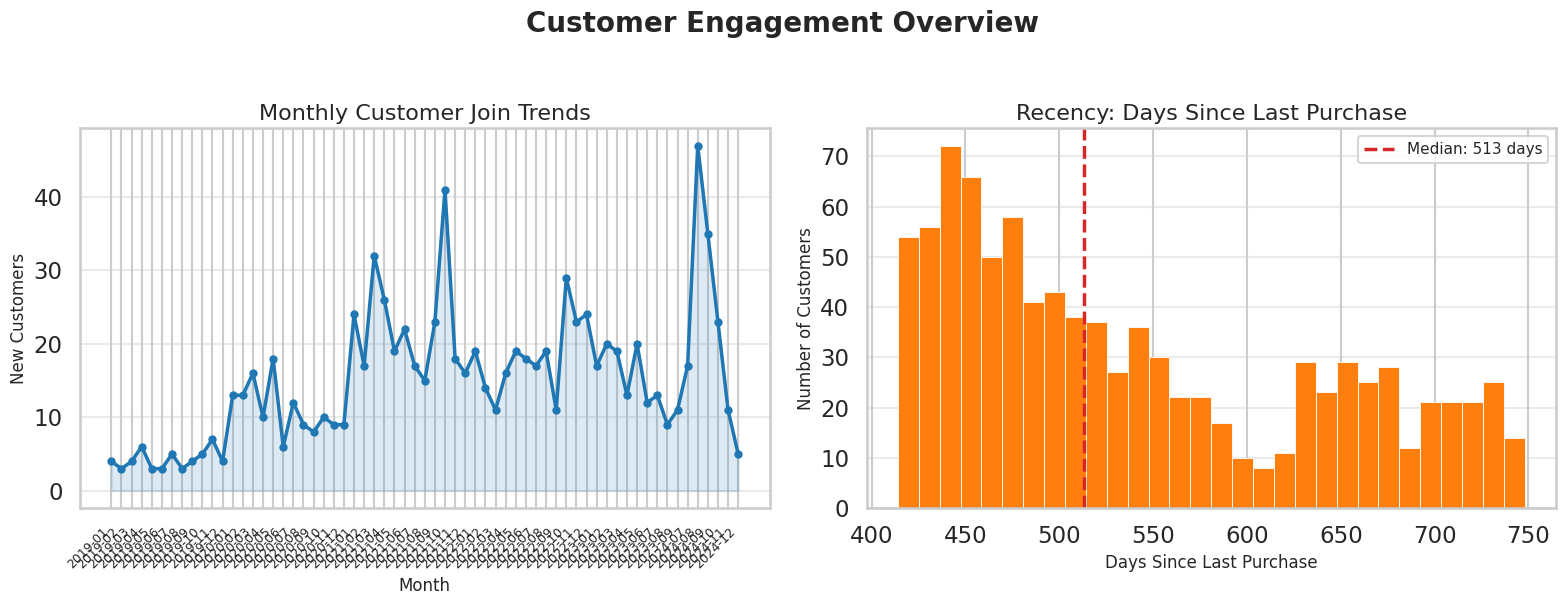

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

df['join_date'] = pd.to_datetime(df['join_date'])
df['join_month'] = df['join_date'].dt.to_period('M')
monthly_joins = df.groupby('join_month').size().reset_index(name='count')
monthly_joins['join_month'] = monthly_joins['join_month'].astype(str)

axes[0].plot(monthly_joins['join_month'], monthly_joins['count'],
             color='#1f77b4', linewidth=2.5, marker='o', markersize=5)
axes[0].fill_between(range(len(monthly_joins)), monthly_joins['count'],
                     alpha=0.15, color='#1f77b4')
axes[0].set_xticks(range(len(monthly_joins)))
axes[0].set_xticklabels(monthly_joins['join_month'], rotation=45, ha='right', fontsize=9)
axes[0].set_title('Monthly Customer Join Trends', fontsize=16)
axes[0].set_xlabel('Month', fontsize=12)
axes[0].set_ylabel('New Customers', fontsize=12)
axes[0].grid(axis='y', alpha=0.4)

df['last_purchase_date'] = pd.to_datetime(df['last_purchase_date'])
df['days_since_last_purchase'] = (pd.Timestamp.today() - df['last_purchase_date']).dt.days

axes[1].hist(df['days_since_last_purchase'].dropna(), bins=30,
             color='#ff7f0e', edgecolor='white', linewidth=0.6)
axes[1].axvline(df['days_since_last_purchase'].median(), color='#d62728',
                linewidth=2.5, linestyle='--', label=f"Median: {df['days_since_last_purchase'].median():.0f} days")
axes[1].set_title('Recency: Days Since Last Purchase', fontsize=16)
axes[1].set_xlabel('Days Since Last Purchase', fontsize=12)
axes[1].set_ylabel('Number of Customers', fontsize=12)
axes[1].legend(fontsize=11)
axes[1].grid(axis='y', alpha=0.4)

plt.suptitle('Customer Engagement Overview', fontsize=20, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

/tmp/ipykernel_10148/1304366647.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipykernel_10148/1304366647.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


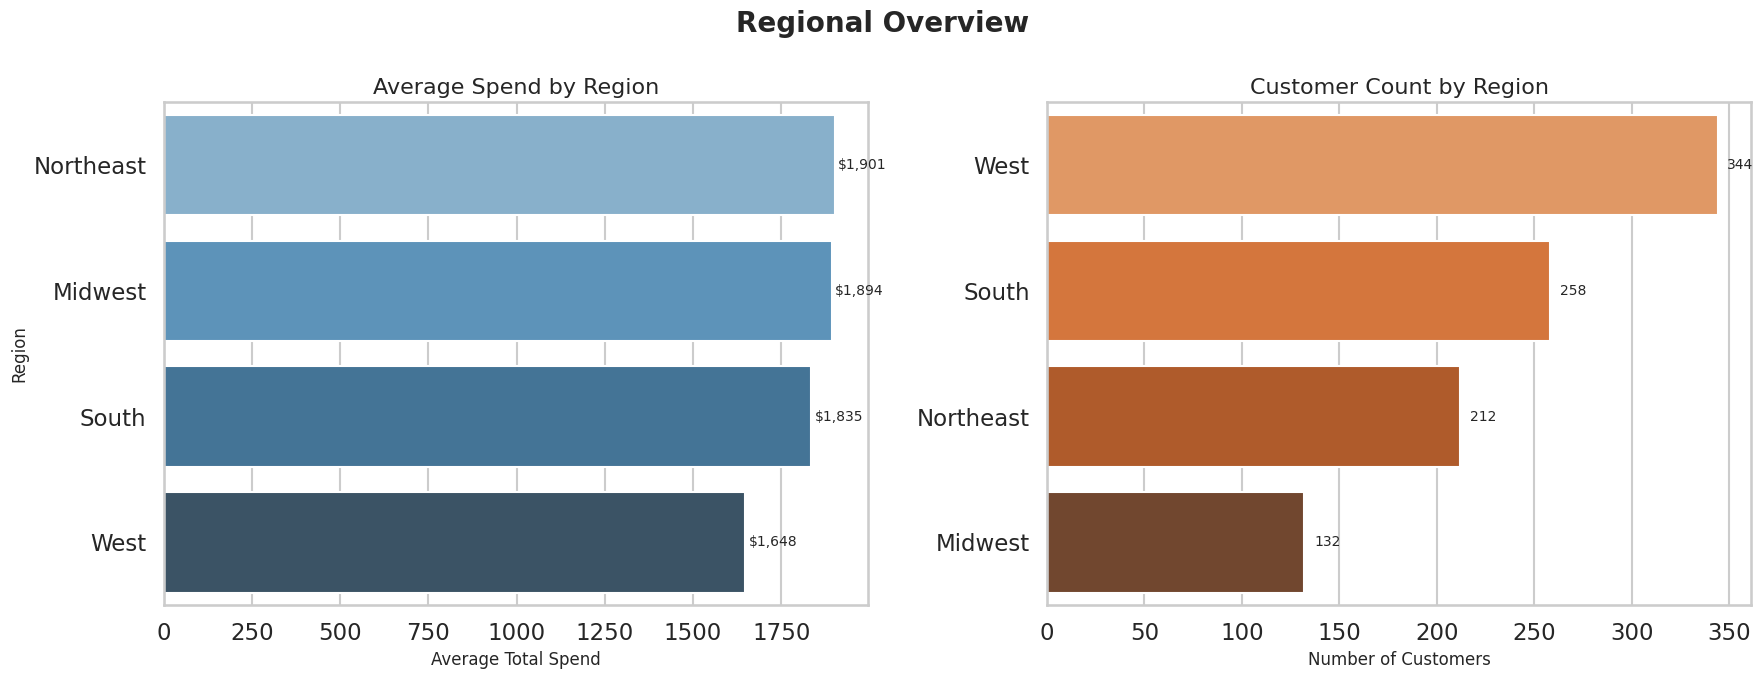

In [24]:
fig, axes = plt.subplots(1, 2, figsize=(18, 7))

avg_spend = df.groupby('region')['total_spend'].mean().sort_values(ascending=False).reset_index()

sns.barplot(
    x='total_spend', y='region', data=avg_spend,
    palette='Blues_d', ax=axes[0]
)
axes[0].set_title('Average Spend by Region', fontsize=16)
axes[0].set_xlabel('Average Total Spend', fontsize=12)
axes[0].set_ylabel('Region', fontsize=12)
for i, v in enumerate(avg_spend['total_spend']):
    axes[0].text(v + 10, i, f'${v:,.0f}', va='center', fontsize=10)

customer_count = df.groupby('region').size().sort_values(ascending=False).reset_index(name='count')

sns.barplot(
    x='count', y='region', data=customer_count,
    palette='Oranges_d', ax=axes[1]
)
axes[1].set_title('Customer Count by Region', fontsize=16)
axes[1].set_xlabel('Number of Customers', fontsize=12)
axes[1].set_ylabel('')
for i, v in enumerate(customer_count['count']):
    axes[1].text(v + 5, i, f'{v:,}', va='center', fontsize=10)

plt.suptitle('Regional Overview', fontsize=20, fontweight='bold')
plt.tight_layout()
plt.show()

/tmp/ipykernel_10148/197814159.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipykernel_10148/197814159.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


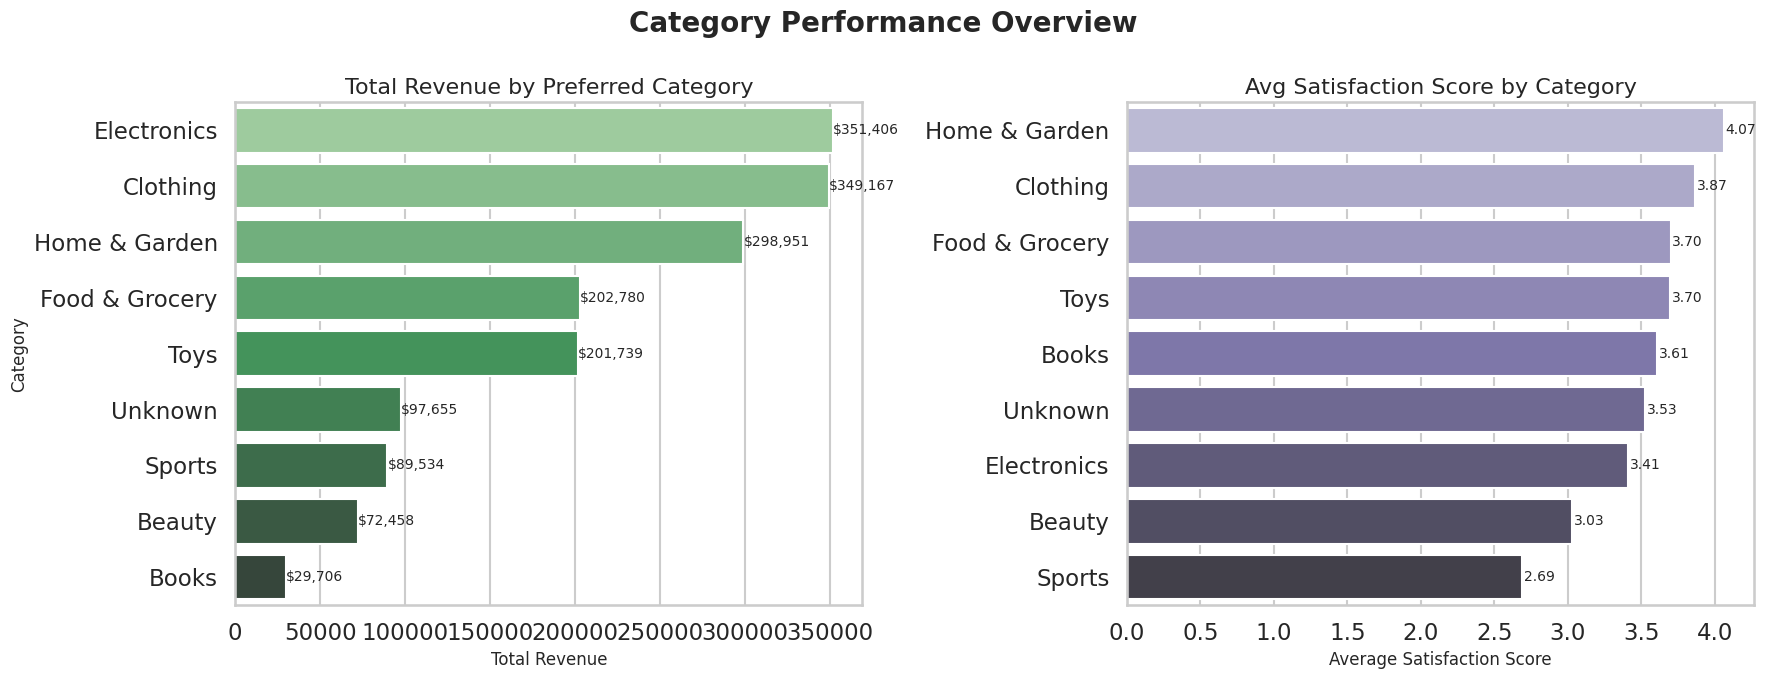

In [25]:
fig, axes = plt.subplots(1, 2, figsize=(18, 7))

revenue_by_category = df.groupby('preferred_category')['total_spend'].sum().sort_values(ascending=False).reset_index()

sns.barplot(
    x='total_spend', y='preferred_category', data=revenue_by_category,
    palette='Greens_d', ax=axes[0]
)
axes[0].set_title('Total Revenue by Preferred Category', fontsize=16)
axes[0].set_xlabel('Total Revenue', fontsize=12)
axes[0].set_ylabel('Category', fontsize=12)
for i, v in enumerate(revenue_by_category['total_spend']):
    axes[0].text(v + 10, i, f'${v:,.0f}', va='center', fontsize=10)

avg_satisfaction = df.groupby('preferred_category')['satisfaction_score'].mean().sort_values(ascending=False).reset_index()

sns.barplot(
    x='satisfaction_score', y='preferred_category', data=avg_satisfaction,
    palette='Purples_d', ax=axes[1]
)
axes[1].set_title('Avg Satisfaction Score by Category', fontsize=16)
axes[1].set_xlabel('Average Satisfaction Score', fontsize=12)
axes[1].set_ylabel('')
for i, v in enumerate(avg_satisfaction['satisfaction_score']):
    axes[1].text(v + 0.01, i, f'{v:.2f}', va='center', fontsize=10)

plt.suptitle('Category Performance Overview', fontsize=20, fontweight='bold')
plt.tight_layout()
plt.show()